# **Mildew Detector for Cherry Trees**

## Objectives

* Fetch data from Kaggle and prepare it for further ML processing.

## Inputs

* Kaggle.json file -authentication token

## Outputs

* Generate Dataset: inputs/datasets/cherry_leaves

## Additional Comments
 



No comments

---

# Change working directory

In [1]:
import numpy
import os
from pathlib import Path


Change the working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/P5-Mildew-Detection-in-Cherry-Leaves/jupyter_notebooks'

In [3]:
os.chdir('/workspace/P5-Mildew-Detection-in-Cherry-Leaves')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/P5-Mildew-Detection-in-Cherry-Leaves'

# Install Kaggle

Section 1 content

In [5]:
# Install Kaggle package
!pip install kaggle 

---

Change the Kaggle configuration directory to current working directory and permission of Kaggle authentication json.

In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

Set Kaggle Dataset and download it.

In [7]:
KaggleDatasetPath = "codeinstitute/cherry-leaves"
DestinationFolder = "inputs/cherry_leaves"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}


Dataset URL: https://www.kaggle.com/datasets/codeinstitute/cherry-leaves
License(s): unknown
 93%|███████████████████████████████████▏  | 51.0M/55.0M [00:02<00:00, 29.4MB/s]
100%|██████████████████████████████████████| 55.0M/55.0M [00:02<00:00, 23.3MB/s]


Unzip the downloaded file, and delete the zip file.

In [8]:
import zipfile
with zipfile.ZipFile(DestinationFolder + '/cherry-leaves.zip', 'r') as zip_ref:
    zip_ref.extractall(DestinationFolder)

os.remove(DestinationFolder + '/cherry-leaves.zip')

# Data Preparation

Check and Remove non-image files

---

In [9]:

def remove_non_image_file(my_data_dir):
    image_extension = ('.png', '.jpg', '.jpeg')
    folders = os.listdir(my_data_dir)
    for folder in folders:
        files = os.listdir(my_data_dir + '/' + folder)
        # print(files)
        i = []
        j = []
        for given_file in files:
            if not given_file.lower().endswith(image_extension):
                file_location = my_data_dir + '/' + folder + '/' + given_file
                os.remove(file_location)  # remove non image file
                i.append(1)
            else:
                j.append(1)
                pass
        print(f"Folder: {folder} - has image file", len(j))
        print(f"Folder: {folder} - has non-image file", len(i))

In [10]:
remove_non_image_file(my_data_dir='inputs/cherry_leaves/cherry-leaves')

Folder: healthy - has image file 2104
Folder: healthy - has non-image file 0
Folder: powdery_mildew - has image file 2104
Folder: powdery_mildew - has non-image file 0


Split train validation set

In [11]:
import os
import shutil
import random

def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
    """
    Split the dataset of images into train, validation, and test sets.

    Args:
        my_data_dir (str): Path to the dataset directory containing class folders.
        train_set_ratio (float): Proportion of data to be used for training.
        validation_set_ratio (float): Proportion of data to be used for validation.
        test_set_ratio (float): Proportion of data to be used for testing.

    Returns:
        None
    """
    # Check if ratios sum to 1.0
    if not abs(train_set_ratio + validation_set_ratio + test_set_ratio - 1.0) < 1e-6:
        raise ValueError("train_set_ratio, validation_set_ratio, and test_set_ratio should sum to 1.0.")

    # Get class labels (folder names)
    labels = [label for label in os.listdir(my_data_dir) if os.path.isdir(os.path.join(my_data_dir, label))]

    # Create train, validation, test directories
    for folder in ['train', 'validation', 'test']:
        for label in labels:
            os.makedirs(os.path.join(my_data_dir, folder, label), exist_ok=True)

    for label in labels:
        class_dir = os.path.join(my_data_dir, label)
        files = [file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))]
        random.shuffle(files)

        # Calculate split indices
        train_count = int(len(files) * train_set_ratio)
        val_count = int(len(files) * validation_set_ratio)
        
        train_files = files[:train_count]
        val_files = files[train_count:train_count + val_count]
        test_files = files[train_count + val_count:]

        # Move files to corresponding folders
        for file in train_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(my_data_dir, 'train', label, file))

        for file in val_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(my_data_dir, 'validation', label, file))

        for file in test_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(my_data_dir, 'test', label, file))

        # Remove the original class folder if empty
        if not os.listdir(class_dir):
            os.rmdir(class_dir)

    print("Data successfully split into train, validation, and test sets.")
    

In [12]:
split_train_validation_test_images(my_data_dir = f"inputs/cherry_leaves/cherry-leaves",
                        train_set_ratio = 0.7,
                        validation_set_ratio=0.1,
                        test_set_ratio=0.2
                        )

Data successfully split into train, validation, and test sets.


Verify class balance in training set

Load Dataset

In [ ]:
import os

# Path to the training set
train_dir = "inputs/cherry_leaves/cherry-leaves/train"

# Count and plot for training set only
train_classes = os.listdir(train_dir)
train_class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in train_classes}

print("Training Set Class Distribution:", train_class_counts)


Training Set Class Distribution: {'healthy': 1472, 'powdery_mildew': 1472}


Visualise Class Distribution

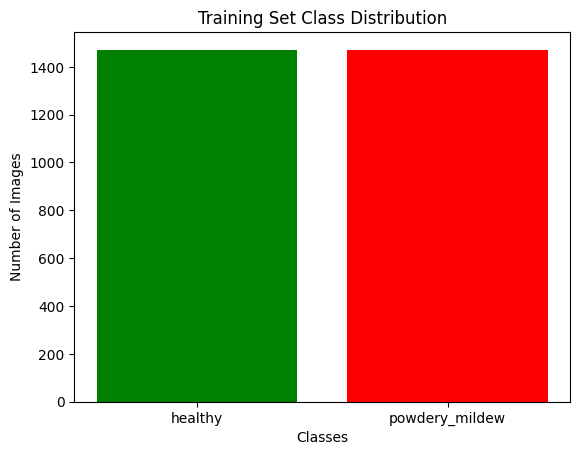

In [19]:
import matplotlib.pyplot as plt

# Bar chart for class distribution
plt.bar(train_class_counts.keys(), train_class_counts.values(), color=['green', 'red'])
plt.title('Training Set Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()


Check the validation set - Just to be aware of any natural inconsistencies or huge imbalances. This awareness will be used when the data set increases with more species and images. This does not need to be modified!

In [23]:
# Path to the validation set
validation_dir = "inputs/cherry_leaves/cherry-leaves/validation"

# Count and plot for validation set
validation_classes = os.listdir(validation_dir)
validation_class_counts = {cls: len(os.listdir(os.path.join(validation_dir, cls))) for cls in validation_classes}

print("Validation Set Class Distribution:", validation_class_counts)


Validation Set Class Distribution: {'healthy': 210, 'powdery_mildew': 210}


---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
